In [1]:
%matplotlib inline

In [17]:
from __future__ import print_function
import cPickle
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import peakTree

def lin2z(array):
    return 10*np.log10(array)

def z2lin(array):
    return 10**(array/10.)

peaks2vel = lambda vel, peaks: [(vel[peak[0]], vel[peak[1]]) for peak in peaks]
vel2str = lambda vel : ['({:4.2f} {:4.2f})'.format(*pair) for pair in vel]
lst2str = lambda lst : ['{:4.2f}'.format(e) for e in lst]

In [18]:
fname = 'example_spectra/mira_1438448249.0_4806.3.pickle'
with open(fname, 'rb') as f:
    pixel = cPickle.load(f)
print(pixel.keys())
print(pixel['zspectrum'].min())

#pixel['noise_thres'] = pixel['zspectrum'].min()
pixel['noise_thres'] = z2lin(-53)

['nheight', 'est_meanvel', 'instr', 'sel_height', 'delta_v', 'sigma_blure', 'sel_timestamp', 'zcrossspectrum', 'ldr', 'total_z', 'vel_list', 'total_snr', 'blured', 'est_width', 'mean_v', 'ntime', 'zspectrum', 'Zrefmmclx']
9.25434645838e-07


In [13]:
def plot(pixel, peaks, thresholds):
    fig, ax = plt.subplots(1, figsize=(8.0, 4.5))
    
    ax.axhline(lin2z(pixel['noise_thres']), color='gray', lw=1)
    for thres in thresholds:
        ax.axhline(thres, color='gray', lw=1)

    ax.step(pixel['vel_list'], lin2z(pixel['zspectrum']),
            ':', color='red', label='cloud radar', where='mid', linewidth=1.3)
    ax.step(pixel['vel_list'], lin2z(pixel['zcrossspectrum']),
            ':', color='firebrick', where='mid', linewidth=1.3)

    ax.axvline(pixel['est_meanvel'], ls='dashed',
               color='red', linewidth=1.1, label='original peak finder')

    for peak in peaks:
        # print('plotting peak ', peak)
        ax.axvline(pixel['vel_list'][peak[0]], color='slategrey')
        ax.axvline(pixel['vel_list'][peak[1]], color='slategrey')


    ax.set_ylabel("Spectral Reflectivity [dBZ]", fontweight='semibold')
    ax.set_xlabel("Velocity [m s$\\mathregular{^{-1}}$]", fontweight='semibold')
    #ax.set_xlim([-7.5, 7.5])
    ax.set_xlim([-6, 2])
    #ax.set_ylim(bottom=-50)
    ax.set_ylim(bottom=-70, top=0)

    ax.tick_params(axis='both', which='major', labelsize=14,
                   width=2, length=4)
    ax.tick_params(axis='both', which='minor', width=1.4, length=3)

    ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(1))
    ax.xaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(0.5))
    ax.legend(fontsize=11, numpoints=1, ncol=1)
    ax.set_title("Spectrum at " + str(pixel['sel_timestamp']) +
                 " " + '{0:4d}m'.format(int(pixel['sel_height'])), fontweight='semibold', fontsize=13)
    plt.tight_layout()
    savename = str(pixel['sel_timestamp']) + "_" \
               + '{0:04d}'.format(int(pixel['sel_height'])) + "m_combined_spectra.png"
    fig.savefig('example_spectra/' + savename, dpi=250)

(0, 256)   [5.012e-06]
  (86, 86)   [5.012e-06]
    (86, 86)   [7.518e-06]
      (86, 86)   [1.128e-05]
  (88, 119)   [5.012e-06]
    (88, 119)   [7.518e-06]
      (88, 119)   [1.128e-05]
        (88, 119)   [1.692e-05]
          (88, 119)   [2.537e-05]
            (88, 119)   [3.806e-05]
              (88, 119)   [5.709e-05]
                (88, 119)   [8.563e-05]
                  (88, 119)   [1.284e-04]
                    (89, 119)   [1.927e-04]
                      (89, 119)   [2.890e-04]
                        (89, 119)   [4.335e-04]
                          (89, 118)   [6.503e-04]
                            (90, 118)   [9.754e-04]
                              (90, 118)   [1.463e-03]
                                (91, 118)   [2.195e-03]
                                  (91, 117)   [3.292e-03]
                                    (92, 106)   [4.938e-03]
                                      (92, 100)   [7.407e-03]
                                        (92, 100)   [1.111e-

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:10: RuntimeWarning: divide by zero encountered in log10


boundaries of the peaks [m/s] (-3.50 -3.50), (-3.34 -2.26), (-2.26 -1.77), (-1.77 -0.78), (-0.53 -0.53)


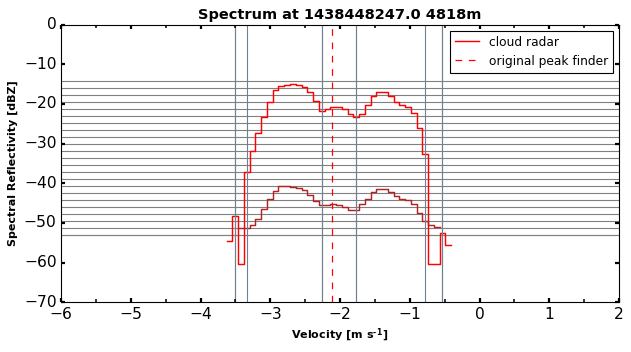

In [20]:
peaks, ptpeak, threslist = peakTree.detect_peak_recursive(pixel['zspectrum'], pixel['noise_thres'], lambda thres: thres*1.5)

thres_list = [lin2z(thres) for thres in threslist]
print('threshold list ', ", ".join(lst2str(thres_list)))

plot(pixel, peaks, thres_list)

print('boundaries of the peaks [m/s]', ", ".join(vel2str(peaks2vel(pixel['vel_list'], peaks))))